# 黑色星期五销售数据分析

## 一、明确分析目标和框架

导入库

In [25]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-bright')#设定绘图风格

## 二、数据导入和理解数据

In [26]:
data=pd.read_csv(r'D:\work\BlackFriday.csv',encoding='gbk')#之前修改过源数据，把列名改为了汉字，采用中国国标编码

In [27]:
pd.options.display.max_rows=10
data.head()

,顾客ID,商品ID,性别,年龄,职业,城市类别,居住时间,婚姻状况,商品类别1,商品类别2,商品类别3,消费金额
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
顾客ID     537577 non-null int64
商品ID     537577 non-null object
性别       537577 non-null object
年龄       537577 non-null object
职业       537577 non-null int64
城市类别     537577 non-null object
居住时间     537577 non-null object
婚姻状况     537577 non-null int64
商品类别1    537577 non-null int64
商品类别2    370591 non-null float64
商品类别3    164278 non-null float64
消费金额     537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


## 三、数据清洗

In [29]:
data.isna().sum()

顾客ID          0
商品ID          0
性别            0
年龄            0
职业            0
          ...  
婚姻状况          0
商品类别1         0
商品类别2    166986
商品类别3    373299
消费金额          0
Length: 12, dtype: int64

In [30]:
data.fillna(0,inplace=True)

## 四、探索分析

### 1、整体销售情况

In [31]:
total_purchase=data['消费金额'].sum()
total_product=data['商品ID'].count()
avg=total_purchase/data['顾客ID'].drop_duplicates(keep='first').count()#平均客单价：总销售额/客户数

In [32]:
print('总销售额:{}亿元'.format(total_purchase/100000000))
print('总销售量：{}'.format(total_product))
print('平均客单价：%.1f元'%avg)

总销售额:50.17668378亿元
总销售量：537577
平均客单价：851751.5元


本次黑色星期五总销售额为50多亿元，总销量为537577，平均客单价为851751.5元

### 2、用户画像分析

性别：

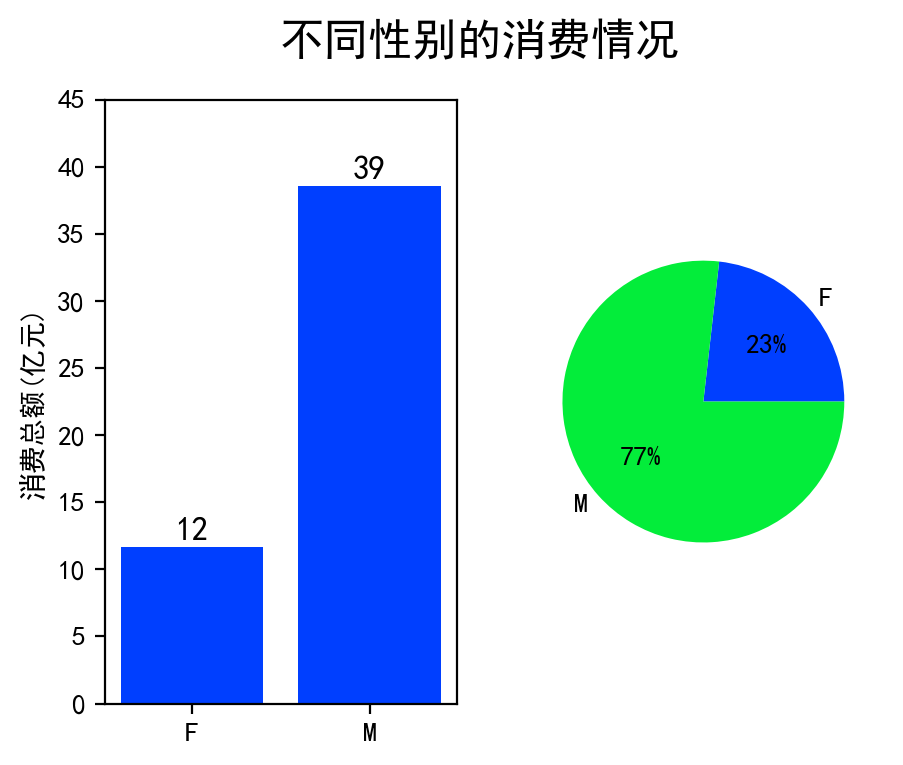

In [33]:
plt.rcParams['font.sans-serif']=['SimHei']#解决中文乱码问题
plt.rcParams['figure.dpi']=200#设置分辨率
fig,ax=plt.subplots(1,2,figsize=(5,4))
picture1=data[['消费金额']].groupby(data['性别']).sum()
picture1=picture1.div(100000000)
picture1s=ax[0].bar(picture1.index,picture1['消费金额'])
ax[0].set_ylabel('消费总额(亿元)')
ax[0].set_ylim((0,45))
for picture in picture1s:
    height = picture.get_height()
    ax[0].text(picture.get_x() + picture.get_width() / 2, height+0.2, '%.f'%height, ha='center', va='bottom',fontsize=12)
labels=[u"F",u"M"]
picture1=ax[1].pie(picture1['消费金额'],labels=labels,autopct='%1.0f%%')
fig.suptitle('不同性别的消费情况',fontsize=16)
plt.show()

男性为消费主力，足足为女性的三倍之多。

年龄：

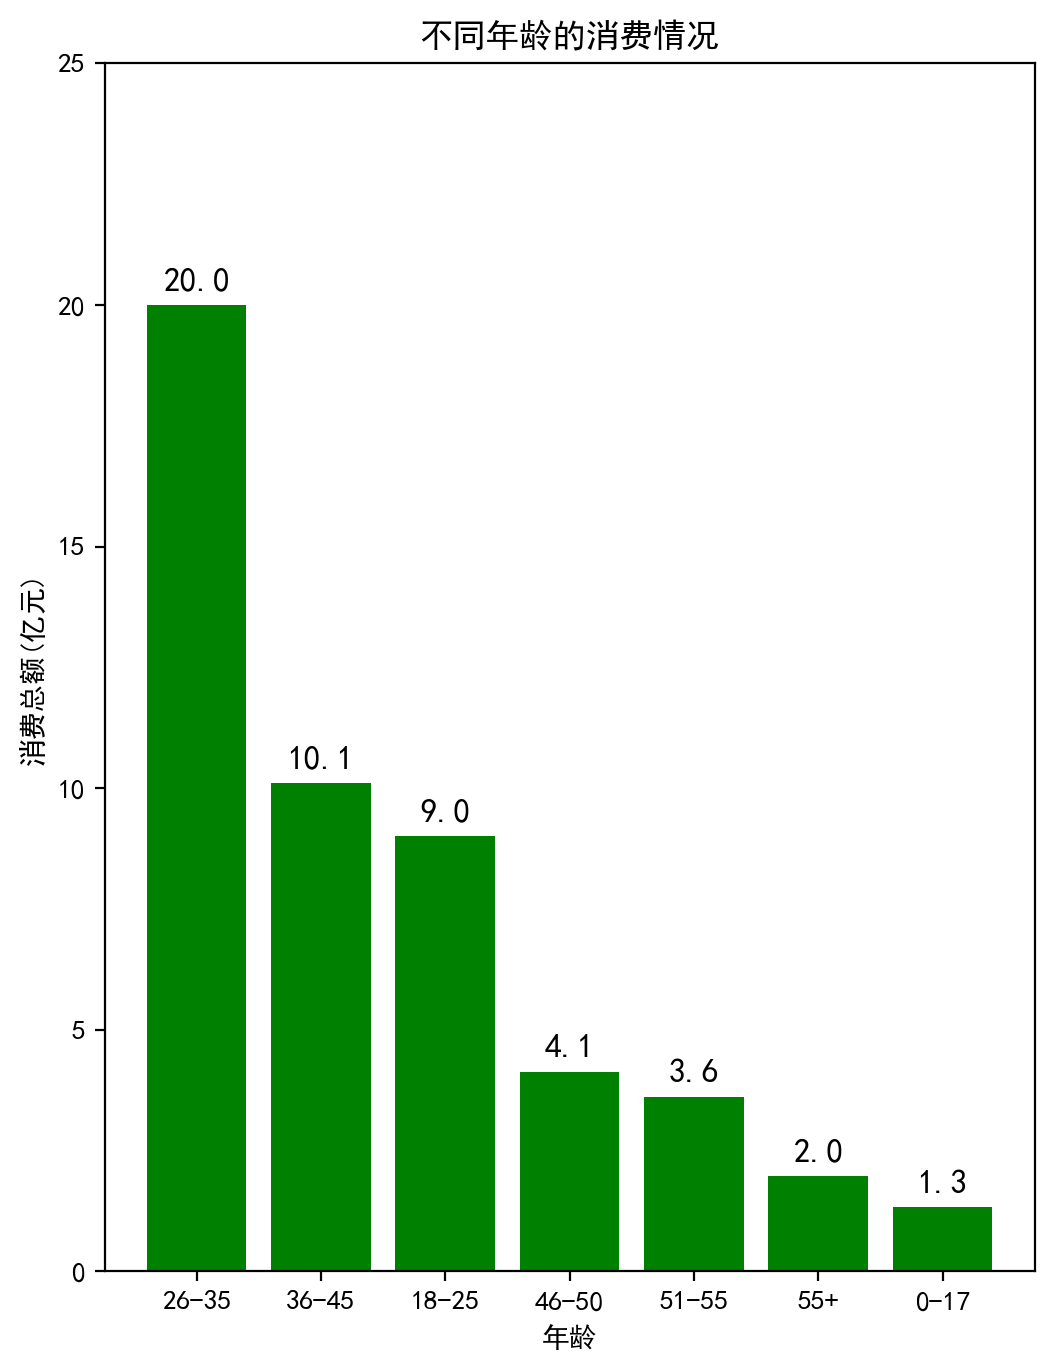

In [34]:
Age=data[['消费金额']].groupby(data['年龄']).sum()
Age=Age.div(100000000)
Age=Age.sort_values(by='消费金额',ascending=False)
fig=plt.figure(figsize=(6,8))
Ages=plt.bar(Age.index,Age['消费金额'],color='g')
plt.title('不同年龄的消费情况')
plt.xlabel('年龄')
plt.ylabel('消费总额(亿元)')
plt.ylim((0,25))
for Age1 in Ages:
    height = Age1.get_height()
    plt.text(Age1.get_x()+Age1.get_width()/2,height+0.2,'%.1f'%height,ha='center',va='bottom',fontsize=12)
plt.show()

26-35岁一般为在职场5-10年的人，他们压力相对较小，经济状况良好，占据了主导地位。

36-45岁都是上有老小有下，经济实力良好，但消费观成熟，属于理性消费一类。

18-25岁为初入大学或职场，消费比较有活力，对世界充满好奇，但是经济实力较低。

职业：

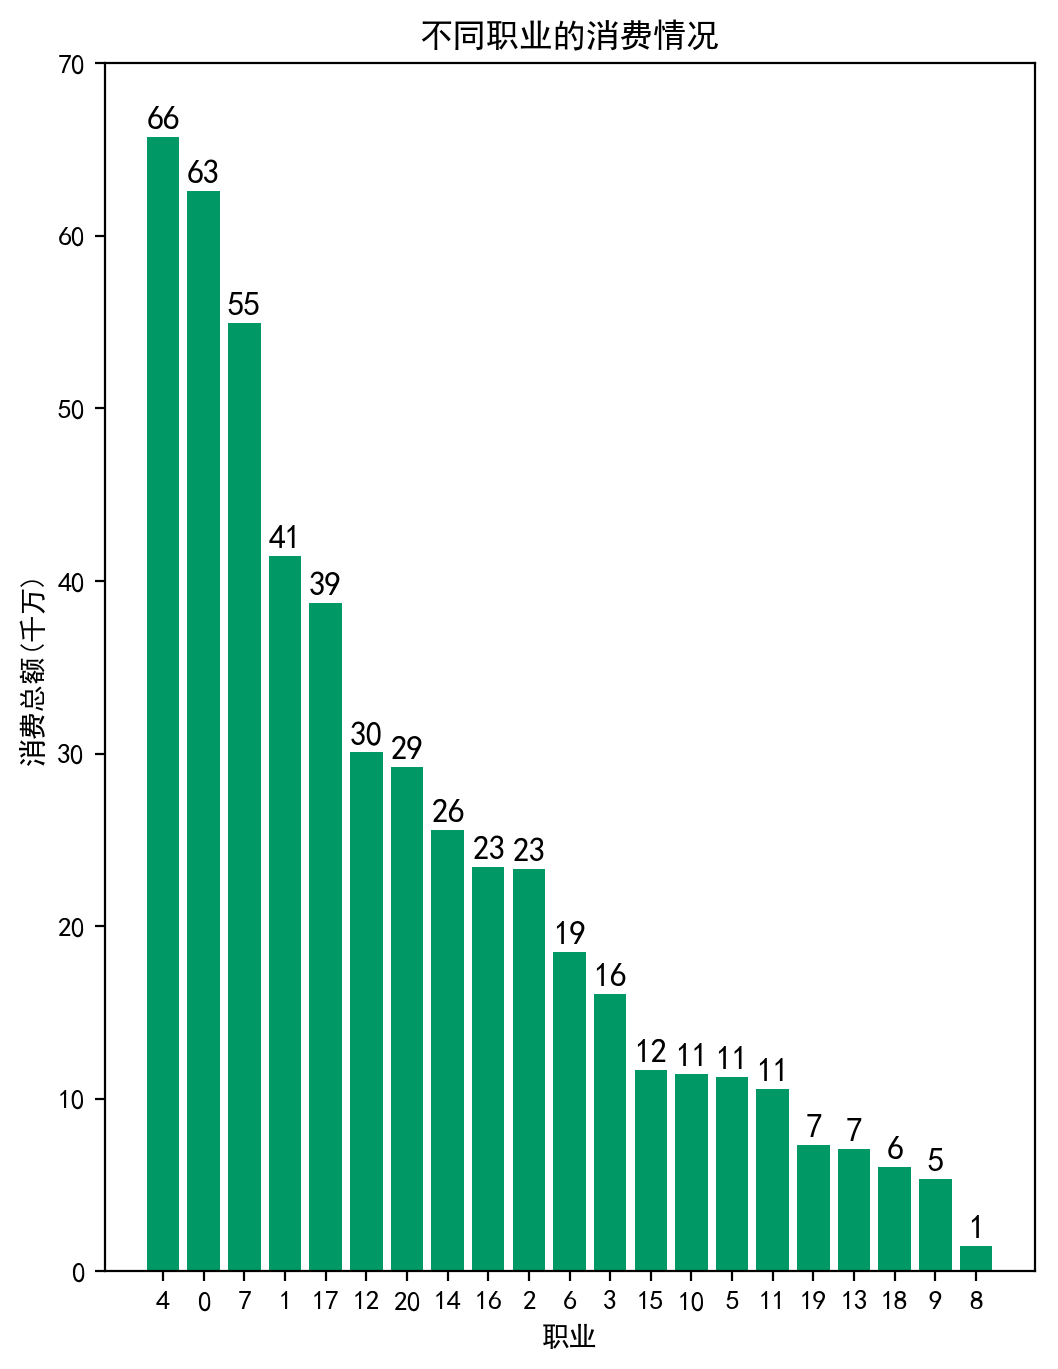

In [35]:
occupation=data[['消费金额']].groupby(data['职业']).sum()
occupation=occupation.div(10000000).sort_values(by='消费金额',ascending=False).reset_index()
occupation['职业']=occupation['职业'].values.astype('str')
fig=plt.figure(figsize=(6,8))
occupations=plt.bar(occupation['职业'],occupation['消费金额'],color='#009966')
plt.title('不同职业的消费情况')
plt.xlabel('职业')
plt.ylabel('消费总额(千万)')
plt.ylim((0,70))
for occupation1 in occupations:
    height = occupation1.get_height()
    plt.text(occupation1.get_x()+occupation1.get_width()/2,height+0.2,'%.f'%height,ha='center',va='bottom',fontsize=12)
plt.show()

职业消费主力前三分别为4、0、7

婚姻状况：

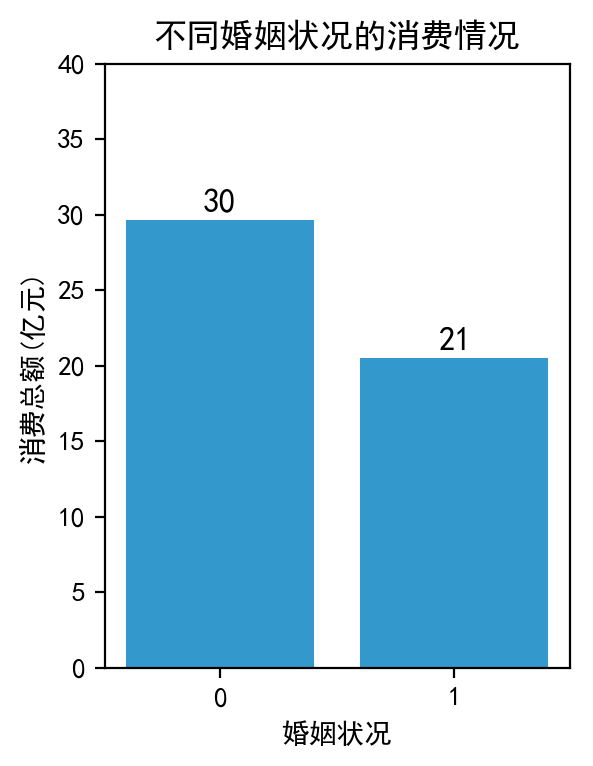

In [36]:
MaritalStatus=data[['消费金额']].groupby(data['婚姻状况']).sum()
MaritalStatus=MaritalStatus.div(100000000).sort_values(by='消费金额',ascending=False).reset_index()
MaritalStatus['婚姻状况']=MaritalStatus['婚姻状况'].values.astype('str')
fig=plt.figure(figsize=(3,4))
MaritalStatuss=plt.bar(MaritalStatus['婚姻状况'],MaritalStatus['消费金额'],color='#3399CC')
plt.title('不同婚姻状况的消费情况')
plt.xlabel('婚姻状况')
plt.ylabel('消费总额(亿元)')
plt.ylim((0,40))
for MaritalStatus1 in MaritalStatuss:
    height = MaritalStatus1.get_height()
    plt.text(MaritalStatus1.get_x()+MaritalStatus1.get_width()/2,height+0.2,'%.f'%height,ha='center',va='bottom',fontsize=12)
plt.show()

未婚比有家庭的更有消费活力

客户细分：

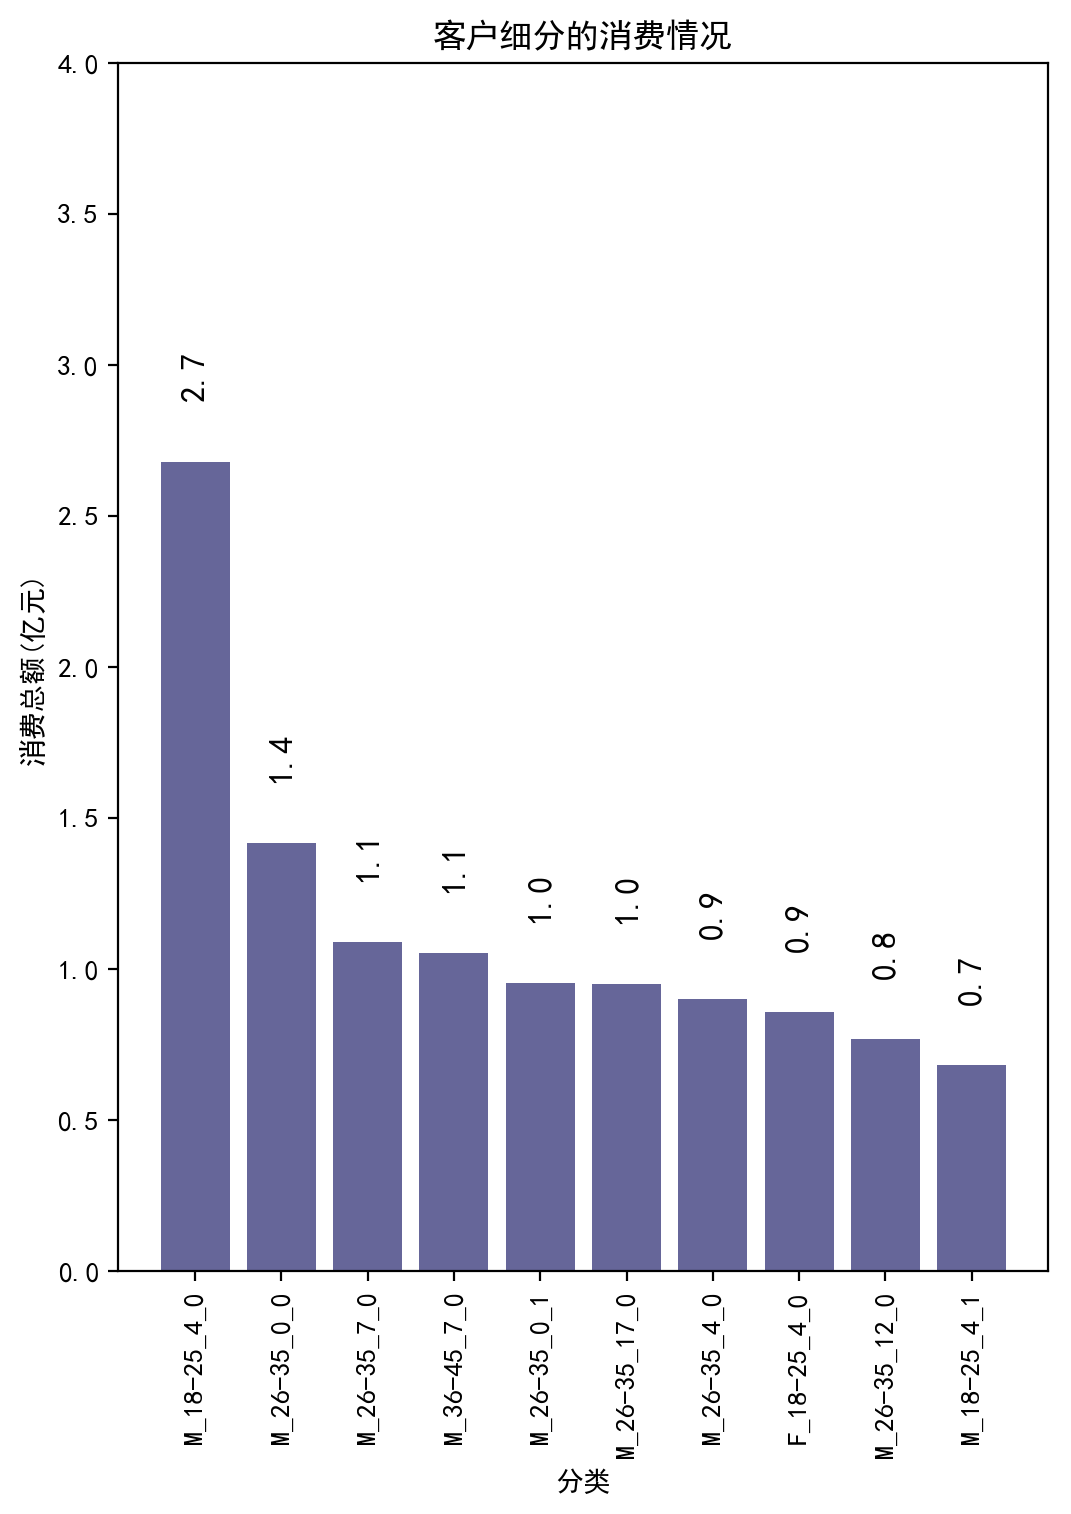

In [37]:
data2=data.copy()
data2['职业']=data2['职业'].values.astype('str')
data2['婚姻状况']=data2['婚姻状况'].values.astype('str')
f=lambda x:x['性别']+'_'+x['年龄']+'_'+x['职业']+'_'+x['婚姻状况']
data2['user']=data2.apply(f,axis=1)
df=data2[['消费金额']].groupby(data2['user']).sum()
df=df.div(100000000).sort_values(by='消费金额',ascending=False).reset_index()
df=df.head(10).copy()
fig=plt.figure(figsize=(6,8))
dfs=plt.bar(df['user'],df['消费金额'],color='#666699',width=0.8)
plt.title('客户细分的消费情况')
plt.xlabel('分类')
plt.ylabel('消费总额(亿元)')
plt.ylim((0,4))
plt.xticks(rotation=90)
for df1 in dfs:
    height = df1.get_height()
    plt.text(df1.get_x()+df1.get_width()/2,height+0.2,'%.1f'%height,ha='center',va='bottom',fontsize=12,rotation=90)
plt.show()

最优价值用户画像：年龄在18-25岁的未婚男性，职业为4

### 3、城市业绩分析

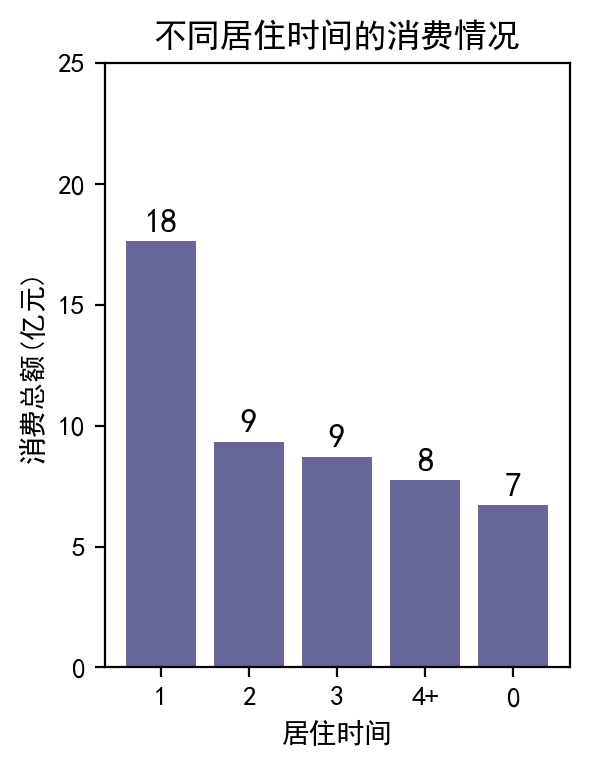

In [38]:
Stay_Year=data[['消费金额']].groupby(data['居住时间']).sum()
Stay_Year=Stay_Year.div(100000000).sort_values(by='消费金额',ascending=False).reset_index()
Stay_Year['居住时间']=Stay_Year['居住时间'].values.astype('str')
fig=plt.figure(figsize=(3,4))
Stay_Years=plt.bar(Stay_Year['居住时间'],Stay_Year['消费金额'],color='#666699')
plt.title('不同居住时间的消费情况')
plt.xlabel('居住时间')
plt.ylabel('消费总额(亿元)')
plt.ylim((0,25))
for Stay_Year1 in Stay_Years:
    height = Stay_Year1.get_height()
    plt.text(Stay_Year1.get_x()+Stay_Year1.get_width()/2,height+0.2,'%.f'%height,ha='center',va='bottom',fontsize=12)
plt.show()

刚到城市居住的人更有消费活力，远超其他。

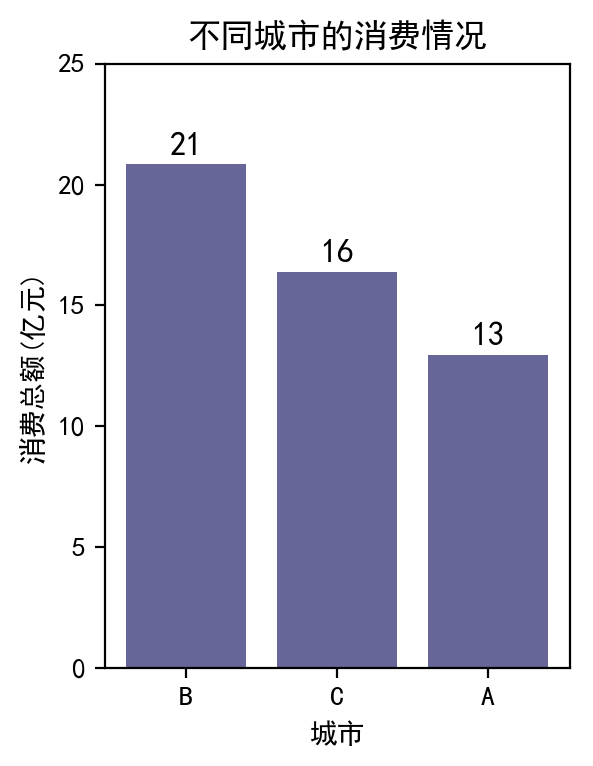

In [39]:
Stay_City=data[['消费金额']].groupby(data['城市类别']).sum()
Stay_City=Stay_City.div(100000000).sort_values(by='消费金额',ascending=False).reset_index()
Stay_City['城市类别']=Stay_City['城市类别'].values.astype('str')
fig=plt.figure(figsize=(3,4))
Stay_Citys=plt.bar(Stay_City['城市类别'],Stay_City['消费金额'],color='#666699')
plt.title('不同城市的消费情况')
plt.xlabel('城市')
plt.ylabel('消费总额(亿元)')
plt.ylim((0,25))
for Stay_City1 in Stay_Citys:
    height = Stay_City1.get_height()
    plt.text(Stay_City1.get_x()+Stay_City1.get_width()/2,height+0.2,'%.f'%height,ha='center',va='bottom',fontsize=12)
plt.show()

### 4、最优产品分析

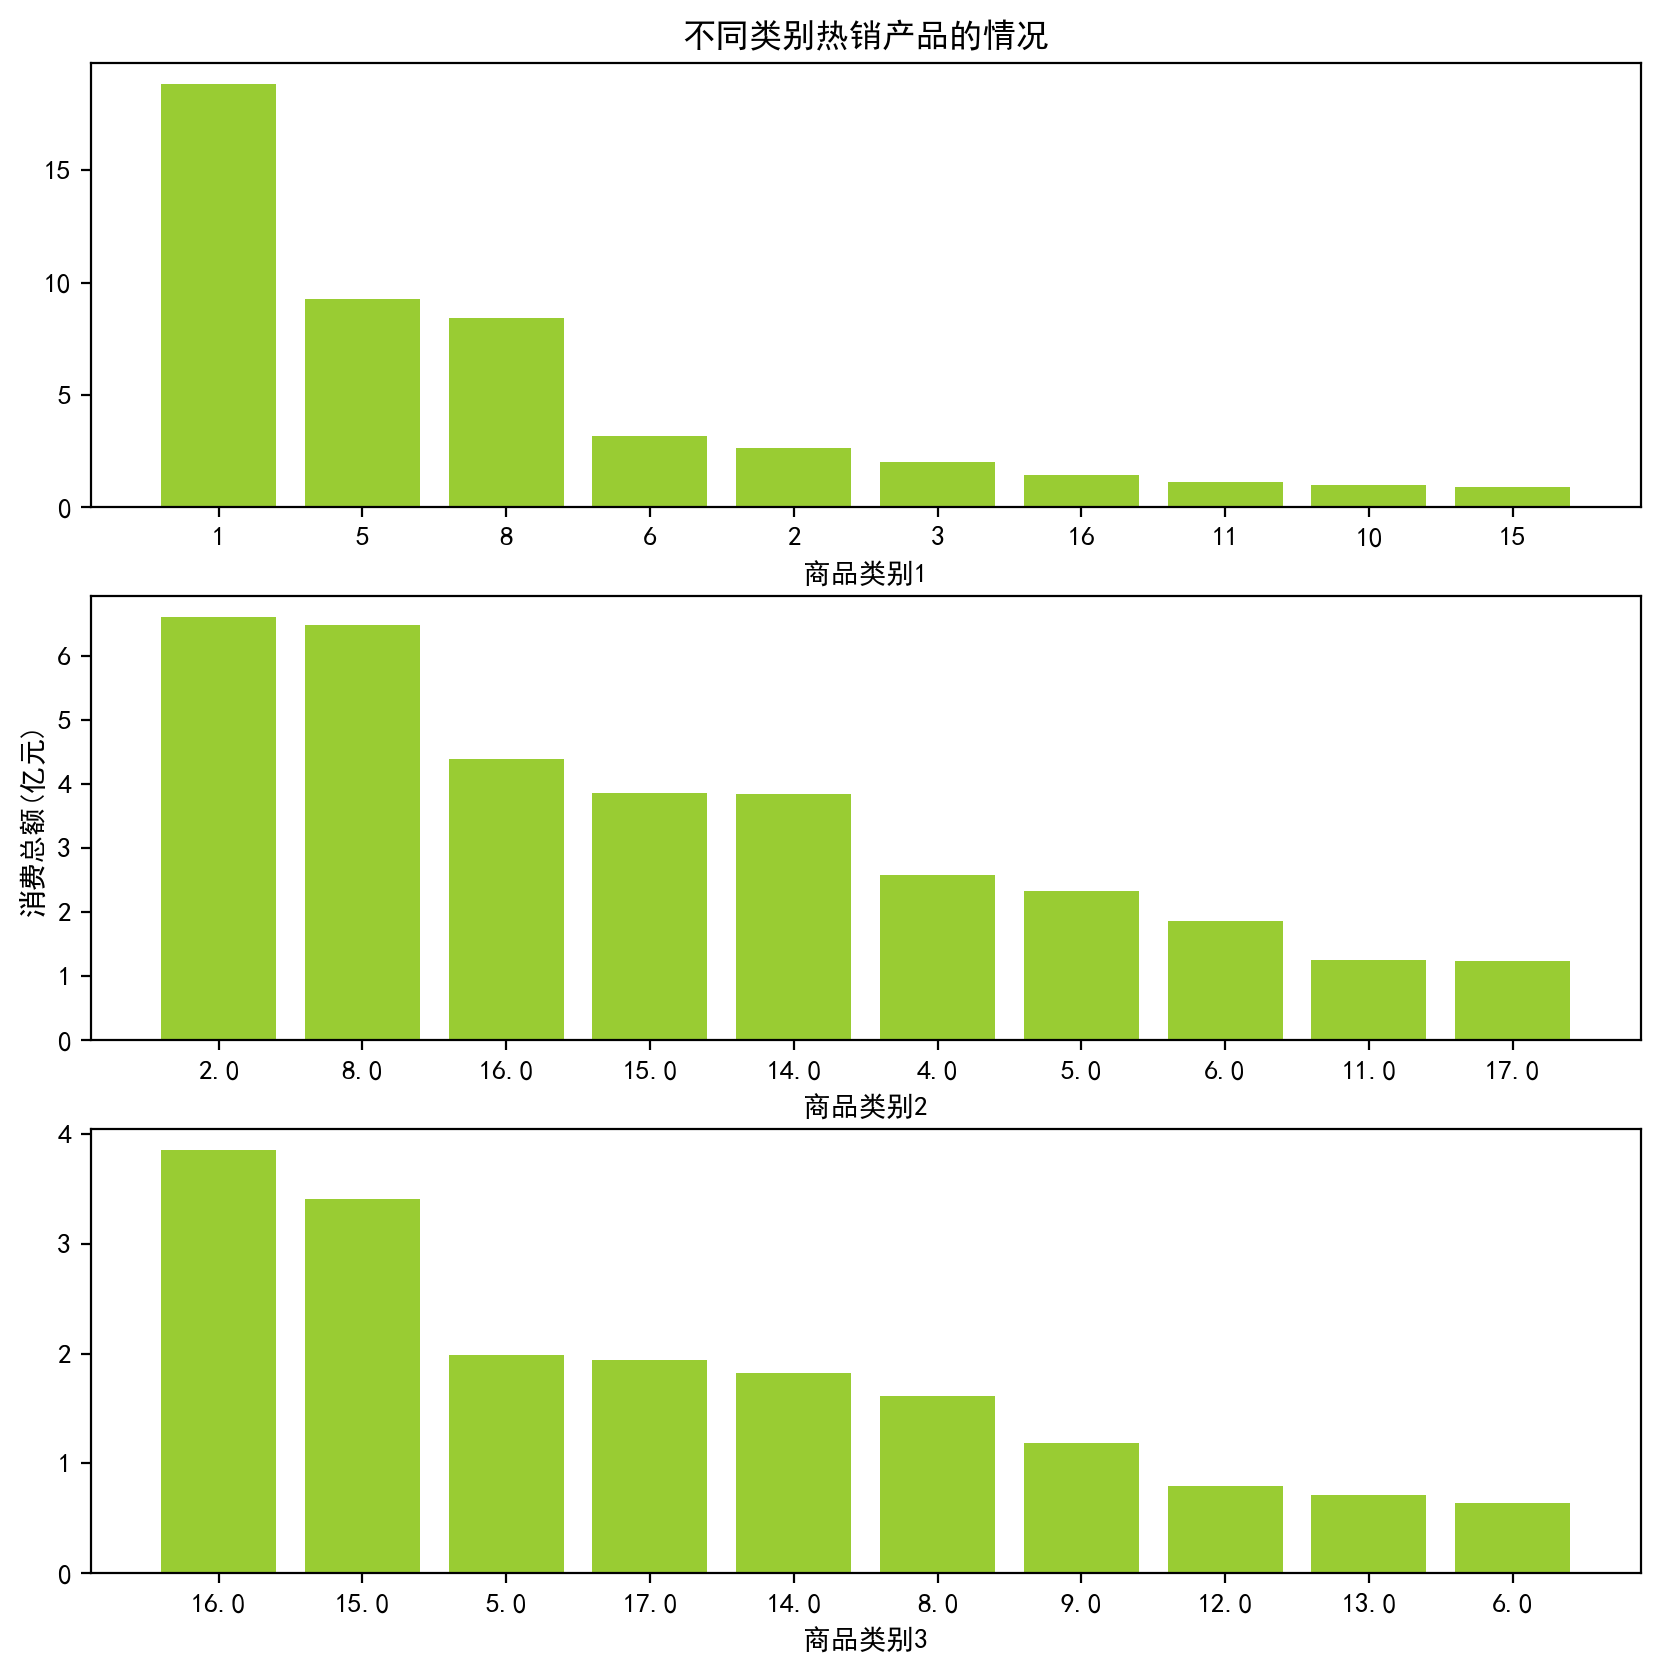

In [40]:
df1=data[['消费金额']].groupby(data['商品类别1']).sum()
df1=df1.div(100000000).sort_values(by='消费金额',ascending=False).reset_index()
df1=df1.head(10)
df1['商品类别1']=df1['商品类别1'].values.astype('str')
data1=data[data['商品类别2']>0]
df2=data1[['消费金额']].groupby(data1['商品类别2']).sum()
df2=df2.div(100000000).sort_values(by='消费金额',ascending=False).reset_index()
df2=df2.head(10)
df2['商品类别2']=df2['商品类别2'].values.astype('str')
data2=data[data['商品类别3']>0]
df3=data2[['消费金额']].groupby(data2['商品类别3']).sum()
df3=df3.div(100000000).sort_values(by='消费金额',ascending=False).reset_index()
df3=df3.head(10)
df3['商品类别3']=df3['商品类别3'].values.astype('str')
fig,ax=plt.subplots(3,1,figsize=(10,10))
ax[1].set_ylabel('消费总额(亿元)')
ax[0].bar(df1['商品类别1'],df1['消费金额'],color='#99CC33')
ax[0].set_xlabel('商品类别1')
ax[1].bar(df2['商品类别2'],df2['消费金额'],color='#99CC33')
ax[1].set_xlabel('商品类别2')
ax[2].bar(df3['商品类别3'],df3['消费金额'],color='#99CC33')
ax[2].set_xlabel('商品类别3')
ax[0].set_title('不同类别热销产品的情况')
plt.show()

产品类型1消费额前三：1、5、8

产品类型2消费额前三：2、8、16

产品类型3消费额前三：16、15、5

## 五、结论

1、聚焦细分市场

2、扩大产品类型1的1、5、8库存

3、可以针对18-25岁的制定一些打折策略